# 7-1 : 영상 시청 후 요약

1. https://www.youtube.com/watch?v=aircAruvnKk&t=16s

머신러닝의 기본적인 개념을 알고 있는 사람의 입장에서, 인공신경망 구조를 이용한 딥러닝 모델들은 무조건 블랙박스다 라고만 생각했었다. 하지만 가장 단순한 인공신경망 구조로 mnist 데이터를 학습했을 때 각 히든 레이어가 가지는 의미를 정말 흥미롭게 들었다. 이미지 데이터에 대해 어떤 층은 사진을 쪼개서 극소적인 부분의 특징을 추출하고, 어떤 층은 쪼개진 특징들을 다시 합하는 역할을 맡는다는 점에서 딥러닝 모델은 전부 블랙박스로 데이터에 대한 해석이 불가능하다는 나의 선입견을 없애주었다.


2. https://www.youtube.com/watch?v=IHZwWFHWa-w

가장 흥미로운 부분은 무작위 데이터셋으로 학습된 모델과 정분류된 데이터셋으로 학습된 모델의 차이였습니다. 무작위 데이터셋으로 학습하더라도 모델은 비용함수를 최소화하는 방향으로 학습하기 때문에 낮은 비용값과 높은 정확도를 보여줍니다. 하지만 학습 과정에서 차이가 발생합니다. 무작위 데이터셋의 경우 실제로는 데이터에 규칙이 존재하지 않기 때문에 비용함수가 반복 횟수에 따라 직선적인 감소를 보여줍니다. 하지만 정분류된 데이터셋의 경우 일반적으로 특정 구간에서 비용함수가 크게 감소하는 모습을 보여줍니다.

영상엔 나온 내용은 아니지만, 학습 모델의 성능은 test 데이터에 대한 평가로 성능을 측정합니다. 무작위 데이터셋의 경우, 훈련 데이터에 대해 비용 함수를 최적화하도록 잘 학습된다고 하더라도 test 데이터를 이용해 성능을 측정하면 제대로된 성능을 보여주기 힘들다고 생각합니다. 즉 모델이 모든 데이터에 대해 일반화가 불가능할 것이라고 생각합니다.


3. https://www.youtube.com/watch?v=Ilg3gGewQ5U

4. https://www.youtube.com/watch?v=tIeHLnjs5U8&t=547s

3번 4번 동영상은 모델의 학습 방법인 경사하강법에 다룬다. 어려운 내용이어서 전부 이해하지는 못했지만, 이해한바로는 인공신경망 모델의 가중치 갱신 방식은 chain rule에 의해 각 가중치별로 미분식을 계산할 수 있다는 점과 전체 가중치들의 gradient를 elementwise calculation과 행렬곱으로 표현할 수 있다는 점으로 이루어 진다는 것이다.



# 7-2 : 경사하강법 영상 시청 후 줄거리 서술

https://www.youtube.com/watch?v=sDv4f4s2SB8

머신러닝의 학습 방법 중 하나인 경사하강법을 다루는 동영상이다. 가장 단순한 모형인 단순선형회귀를 예시로 가중치가 변함에 따라 비용 함수가 어떻게 변하는지 살펴보았다. 비용함수는 대체적으로 sum of squared error를 사용하고 비용함수를 가중치로 편미분한 식을 이용해 gradient를 계산해 가중치를 갱신하는 것이 경사하강법의 기본 개념이다. 모델이 복잡해지면 chain rule에 따라 각 가중치의 편미분식을 구해 출력층에서 계산된 에러를 전달할 수 있다. 마지막으로 학습과 관련한 파라미터인 learning rate, epoch, batch size에 관하여 공부하였다.




# 7-3 : 선형회귀

statsmodels의 linear regression 이용

In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import time

In [ ]:
plt.style.use('ggplot')

In [ ]:
import os

datapath = os.path.join("datasets", "lifesat", "")

# Download the data

import urllib.request

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
os.makedirs(datapath, exist_ok=True)
for filename in ("oecd_bli_2015.csv", "gdp_per_capita.csv"):
    print("Downloading", filename)
    url = DOWNLOAD_ROOT + "datasets/lifesat/" + filename
    urllib.request.urlretrieve(url, datapath + filename)

In [ ]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

In [ ]:
# Load the data
oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv(datapath + "gdp_per_capita.csv",thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")

# Prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
country_stats.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29 entries, Russia to United States
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GDP per capita     29 non-null     float64
 1   Life satisfaction  29 non-null     float64
dtypes: float64(2)
memory usage: 696.0+ bytes


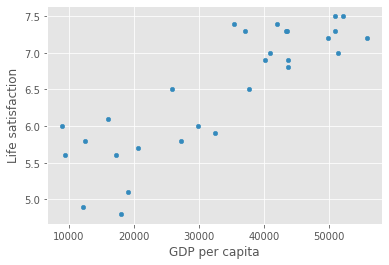

In [ ]:
# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()

In [ ]:
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

In [ ]:
# linear model using statsmodels.api.OLS

import statsmodels.api as sm

X_ = sm.add_constant(X)

model = sm.OLS(y, X_)
result = model.fit()

print(result.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     74.67
Date:                Sat, 17 Apr 2021   Prob (F-statistic):           2.95e-09
Time:                        13:05:41   Log-Likelihood:                -16.345
No. Observations:                  29   AIC:                             36.69
Df Residuals:                      27   BIC:                             39.42
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.8531      0.207     23.481      0.0

In [ ]:
# Make a prediction for Cyprus

X_new = np.array([[1, 22587]])  # Cyprus' GDP per capita
print(result.predict(X_new)) # outputs [[ 5.96242338]]

[5.96242338]


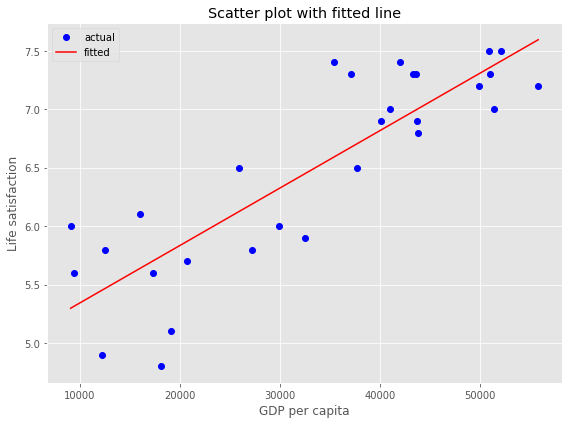

In [ ]:
plt.figure(figsize = (8, 6))

plt.plot(X, y, 'bo', label = 'actual')
plt.plot(X, result.predict(X_), 'r-', label = 'fitted')

plt.title("Scatter plot with fitted line")
plt.xlabel("GDP per capita")
plt.ylabel("Life satisfaction")
plt.legend()

plt.tight_layout()
plt.show()

# 7-4 : 배치 경사하강법

In [ ]:
# 경사하강법으로 학습하는 선형회귀모델 구현

class MyLRModel:

    def __init__(self, method = 'batch', learning_rate = 10**(-2),
                 max_iteration = 10000, min_iteration = 100,
                 error_bound = 10**(-8), seed = 410):
      
        self.method = method # batch, mini-batch, stochastic
        if self.method not in ['batch', 'mini-batch', 'stochastic']:
            self.method = 'batch'
        
        self.learning_rate = learning_rate
        self.max_iteration = max_iteration
        self.min_iteration = min_iteration
        self.error_bound = error_bound
        self.seed = seed
        
        self.record_cost = []
        self.coef = 0

    def cost(self, X, Y, coef):
        """cost 함수인 mean squared error 계산"""
        m = X.shape[0]
        value = np.sum((Y - X.dot(coef))**2) / m
        return value

    def gradient(self, X, Y, coef):
        """계수를 갱신하기 위한 gradient 계산"""
        m = X.shape[0]
        value = (X.T.dot(X).dot(coef) - X.T.dot(Y)) / m
        return value

    def fit(self, X, Y):

        # 학습용 데이터셋 및 초기값 구성
        X_train = np.concatenate((np.ones((X.shape[0], 1)), X), axis = 1)
        np.random.seed(self.seed)
        coef = np.random.randn(X_train.shape[1], Y.shape[1])

        start = time.time()

        for i in range(self.max_iteration):
            
            # 배치 경사하강법
            if self.method == 'batch':
                cost_value = self.cost(X = X_train, Y = Y, coef = coef)
                gradient_value = self.gradient(X = X_train, Y = Y, coef = coef)
                coef = coef - self.learning_rate * gradient_value
            
            # 미니배치 경사하강법
            elif self.method == 'mini-batch':
                batch_size = round(X.shape[0] / 10)
                for j in range(10):
                    cost_value = self.cost(X = X_train[batch_size*j:batch_size*(j+1)], Y = Y[batch_size*j:batch_size*(j+1)], coef = coef)
                    gradient_value = self.gradient(X = X_train[batch_size*j:batch_size*(j+1)], Y = Y[batch_size*j:batch_size*(j+1)], coef = coef)
                    coef = coef - self.learning_rate * gradient_value
                
            # 확률적 경사하강법
            elif self.method == 'stochastic':
                for j in range(X.shape[0]):
                    index = np.random.randint(low = 0, high = X.shape[0])
                    cost_value = self.cost(X = X_train[index:index+1], Y = Y[index:index+1], coef = coef)
                    gradient_value = self.gradient(X = X_train[index:index+1], Y = Y[index:index+1], coef = coef)
                    coef = coef - self.learning_rate * gradient_value

            self.record_cost.append(cost_value)

            # 학습 진행상황 출력
            if i % 2000 == 0:
                now = time.time()
                diff = int((now - start) // 60), round((now - start) % 60)
                print("train time : {}m {}s, iteration : {}, train cost : {}".format(diff[0], diff[1], i, cost_value))

            # 정지조건을 만족하면 학습 정지
            if i > self.min_iteration and 0 < self.record_cost[-2] - self.record_cost[-1] <= self.error_bound:
                break
        
        self.coef = coef

    def print_coef(self):

        print("학습 결과")
        for i in range(self.coef.shape[0]):
            print("theta{} : {}".format(i, float(self.coef[i])))

    def plot_cost(self):

        plt.figure(figsize=(6, 4))
        plt.plot(self.record_cost, 'b-', label = 'Cost')
        plt.title("Learning curve of Linear Regression", fontsize = 15)
        plt.legend()
        plt.tight_layout()
        plt.show()

    def plot_fitted(self, X, Y):
        
        X_train = np.concatenate((np.ones((X.shape[0], 1)), X), axis = 1)
        fitted_value = X_train.dot(self.coef)
        
        plt.figure(figsize=(6, 4))
        plt.plot(X, Y, 'bo', label = 'actual', markersize = 5)
        plt.plot(X, fitted_value, 'r-', label = 'fitted')
        plt.title("Plot of actual vs fitted", fontsize = 15)
        plt.legend()
        plt.tight_layout()
        plt.show()

In [ ]:
# 데이터 준비

np.random.seed(20152410)

X = 3 * np.random.rand(100, 1)
Y = 2 + 4 * X + np.random.randn(100, 1)

In [ ]:
batch_model = MyLRModel(method = 'batch', learning_rate = 10**(-3), max_iteration = 30000)

In [ ]:
batch_model.fit(X = X, Y = Y)

train time : 0m 0s, iteration : 0, train cost : 52.70954262525827
train time : 0m 0s, iteration : 2000, train cost : 1.0976042998087738
train time : 0m 0s, iteration : 4000, train cost : 1.095398923891229
train time : 0m 0s, iteration : 6000, train cost : 1.094441406043682
train time : 0m 0s, iteration : 8000, train cost : 1.094024155139787
train time : 0m 0s, iteration : 10000, train cost : 1.093842332610343
train time : 0m 0s, iteration : 12000, train cost : 1.0937631010690696
train time : 0m 0s, iteration : 14000, train cost : 1.0937285748904286


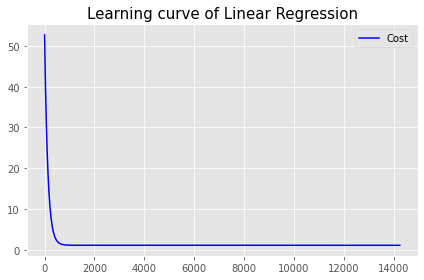

In [ ]:
batch_model.plot_cost()

In [ ]:
batch_model.print_coef()

학습 결과
theta0 : 2.158515910603817
theta1 : 3.9481059602386024


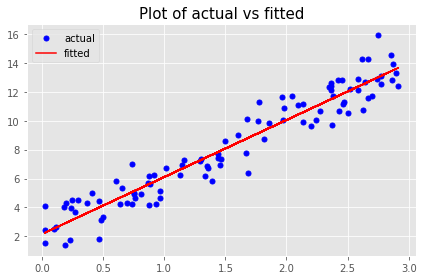

In [ ]:
batch_model.plot_fitted(X = X, Y = Y)

# 7-5 : 확률적 경사하강법

In [ ]:
stochastic_model = MyLRModel(method = 'stochastic', learning_rate = 10**(-5), max_iteration = 30000)

In [ ]:
stochastic_model.fit(X = X, Y = Y)

train time : 0m 0s, iteration : 0, train cost : 0.8367297143397188
train time : 0m 5s, iteration : 2000, train cost : 0.4247512307686045
train time : 0m 11s, iteration : 4000, train cost : 1.754656836001865
train time : 0m 16s, iteration : 6000, train cost : 0.0007493308788276663
train time : 0m 21s, iteration : 8000, train cost : 1.9959167453790805
train time : 0m 26s, iteration : 10000, train cost : 0.3455729666438176
train time : 0m 32s, iteration : 12000, train cost : 0.702467741679054
train time : 0m 37s, iteration : 14000, train cost : 3.387566611418925
train time : 0m 42s, iteration : 16000, train cost : 0.6871299470407243
train time : 0m 48s, iteration : 18000, train cost : 0.005662306098261967
train time : 0m 53s, iteration : 20000, train cost : 0.04438598532883669
train time : 0m 58s, iteration : 22000, train cost : 0.4785262451967657
train time : 1m 3s, iteration : 24000, train cost : 0.4293901500490379
train time : 1m 9s, iteration : 26000, train cost : 0.038243904155781355

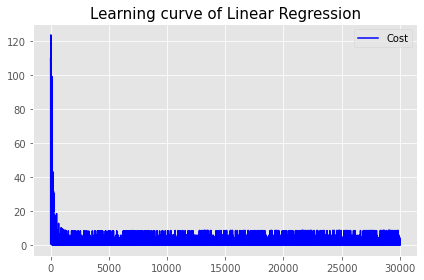

In [ ]:
stochastic_model.plot_cost()

In [ ]:
stochastic_model.print_coef()

학습 결과
theta0 : 2.1779311736449514
theta1 : 3.943683697688124


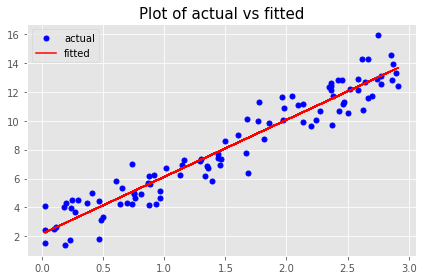

In [ ]:
stochastic_model.plot_fitted(X = X, Y = Y)

# 7-6 : 미니배치 경사하강법

In [ ]:
mini_batch_model = MyLRModel(method = 'mini-batch', learning_rate = 10**(-5), max_iteration = 30000, error_bound = 10**(-10))

In [ ]:
mini_batch_model.fit(X = X, Y = Y)

train time : 0m 0s, iteration : 0, train cost : 42.69192773299144
train time : 0m 0s, iteration : 2000, train cost : 7.47319567483852
train time : 0m 1s, iteration : 4000, train cost : 1.221831575740585
train time : 0m 1s, iteration : 6000, train cost : 0.4253175545343402
train time : 0m 2s, iteration : 8000, train cost : 0.49303781903104865
train time : 0m 2s, iteration : 10000, train cost : 0.6148365839154122
train time : 0m 2s, iteration : 12000, train cost : 0.6899591548123587
train time : 0m 3s, iteration : 14000, train cost : 0.7287753087457245
train time : 0m 3s, iteration : 16000, train cost : 0.747842833396946
train time : 0m 4s, iteration : 18000, train cost : 0.7572086659586377
train time : 0m 4s, iteration : 20000, train cost : 0.7619864765046622
train time : 0m 4s, iteration : 22000, train cost : 0.7646240154227428
train time : 0m 5s, iteration : 24000, train cost : 0.7662638229512035
train time : 0m 5s, iteration : 26000, train cost : 0.7674334262411657
train time : 0m 6s

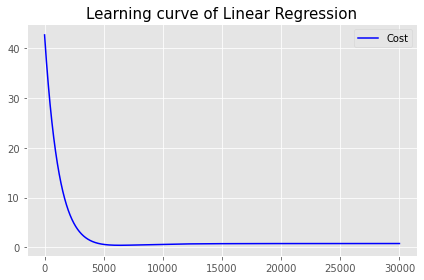

In [ ]:
mini_batch_model.plot_cost()

In [ ]:
mini_batch_model.print_coef()

학습 결과
theta0 : 2.0693857805875857
theta1 : 3.9945652003933585


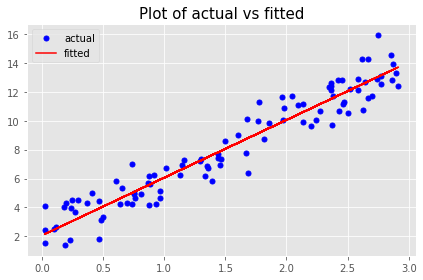

In [ ]:
mini_batch_model.plot_fitted(X = X, Y = Y)

# 7-7 : sklearn LinearRegression을 이용한 회귀분석

선형 회귀 계수 파악  
결과 plot 출력

In [ ]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression

# 데이터 불러오기

boston = load_boston()

In [ ]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [ ]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [ ]:
# 변수에 데이터 저장 및 모델 학습

X_boston = boston.data
Y_boston = boston.target

linear_regression = LinearRegression()
linear_regression.fit(X_boston, Y_boston)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# 학습 결과 출력

print("intercept : ", linear_regression.intercept_)

for i in range(len(boston.feature_names)):
    print("{} coefficient : {}".format(boston.feature_names[i], linear_regression.coef_[i]))

intercept :  36.459488385090125
CRIM coefficient : -0.10801135783679545
ZN coefficient : 0.04642045836688176
INDUS coefficient : 0.02055862636707862
CHAS coefficient : 2.6867338193448966
NOX coefficient : -17.766611228300167
RM coefficient : 3.809865206809212
AGE coefficient : 0.0006922246403425021
DIS coefficient : -1.475566845600255
RAD coefficient : 0.30604947898517226
TAX coefficient : -0.01233459391657437
PTRATIO coefficient : -0.9527472317072923
B coefficient : 0.009311683273793711
LSTAT coefficient : -0.5247583778554923


In [ ]:
# 예측값 생성

pred = linear_regression.predict(X_boston)

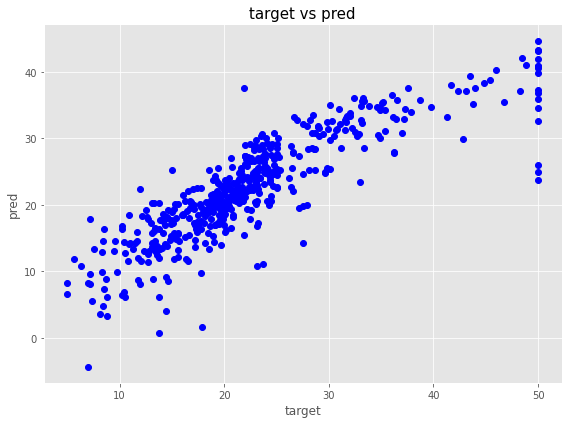

In [ ]:
plt.figure(figsize = (8, 6))

plt.plot(Y_boston, pred, 'bo')
plt.title('target vs pred', fontsize = 15)
plt.xlabel('target')
plt.ylabel('pred')

plt.tight_layout()
plt.show()

target이 50인 지점에 대해 예측이 잘 이루어지지 않는 모습이 관측됨

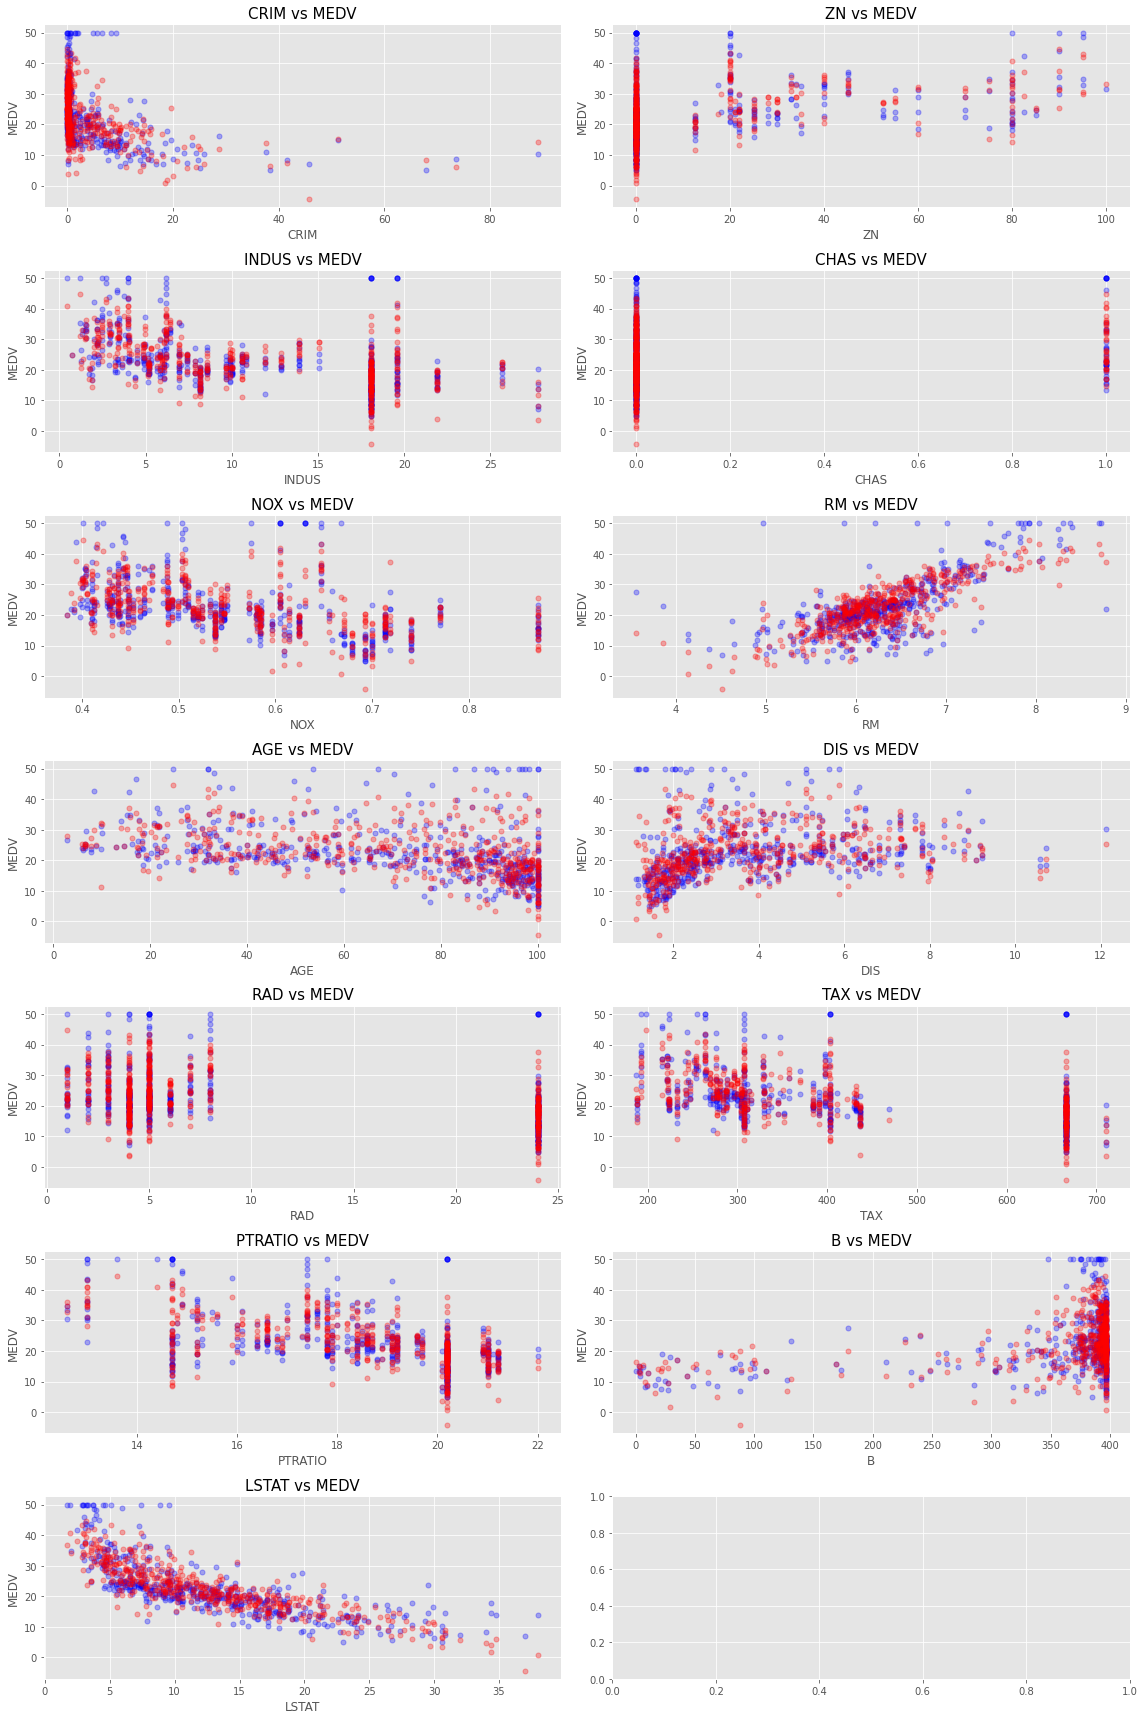

In [ ]:
# 각 변수에 대한 실제값과 예측값 출력

fig, axes = plt.subplots(figsize = (16, 24), nrows = 7, ncols = 2)

axes = axes.ravel()

for i in range(len(boston.feature_names)):
    axes[i].plot(X_boston[:, i], Y_boston, 'bo', markersize = 5, alpha = 0.3)
    axes[i].plot(X_boston[:, i], pred, 'ro', markersize = 5, alpha = 0.3)

    axes[i].set_title("{} vs {}".format(boston.feature_names[i], "MEDV"), fontsize = 15)
    axes[i].set_xlabel(boston.feature_names[i])
    axes[i].set_ylabel("MEDV")



plt.tight_layout()
plt.show()